# Importing the necessary modules

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataf=pd.read_csv('drive/MyDrive/preprocessed_data_3000.csv')

In [ ]:
dataf.head()

,preprocessed_text,category
0,काठमाडौंचैत्र गते उपत्याका कतिपय विद्यालय चैत्...,Education
1,प्रकाश सिलवाल काठमाडौँ चैत गते विगत निर्वाचन द...,Education
2,अमरराज नहर् तनहुँ चैत्र गते तनहुँ सामुदायिक वि...,Education
3,गोरखापत्र समाचारदाता काठमाडौँ चैत गते शिक्षा व...,Education
4,काठमाडौं चैत गते शिक्षा विज्ञान प्रविधिमन्त्री...,Education


# Load our csv file from local device

In [ ]:
df = dataf.copy()

## We count the news per category

In [ ]:
df[["preprocessed_text","category"]].groupby("category").count()

,preprocessed_text
category,
Automobile,2999
Business,3000
Crime,2999
Education,3000
Entertainment,3000
Health,3000
Literature,3000
Market,3000
Politics,3000


## Bar plot of above frequency of text file per category

<Axes: >

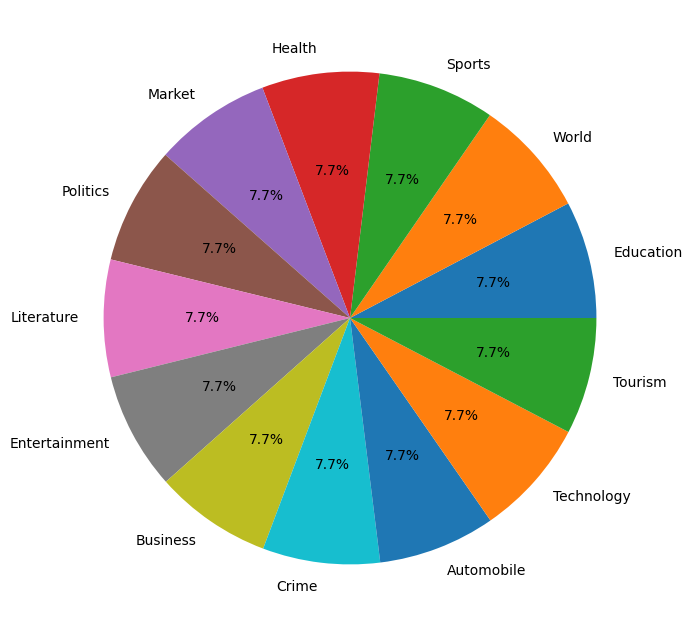

In [ ]:
df.category.value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',ylabel='')

<Axes: xlabel='category'>

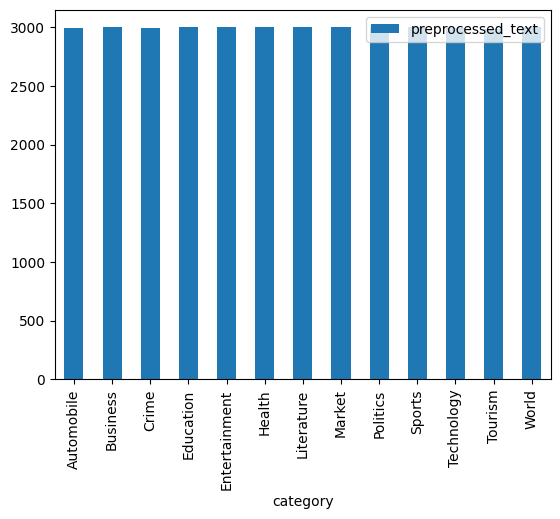

In [ ]:
df[["preprocessed_text","category"]].groupby("category").count().plot(kind="bar")

# Load our Stopwords file

In [ ]:
df['category'].unique()

array(['Education', 'World', 'Sports', 'Technology', 'Crime', 'Health',
       'Market', 'Politics', 'Automobile', 'Tourism', 'Literature',
       'Entertainment', 'Business'], dtype=object)

# Load our Punctuation word file

# Text pre-processing
### Here er wrote a method called preprocess_text that takes data, stop words, and punctuation words as parameters. Then, we created a list called new_cat to hold it. Also initialized noise as numbers. For each words:
   *  #### If word is not in punctuation or stop words then,
   *  #### Do not take this word if it contains noise characters.
   *  #### Remove parenthesis

In [ ]:
ndf = df.copy()


# Splitting data into Train and Test set
  ### Here we are splitting the Train data as 80% and Test data as 20%. Train data are used for model fitting and test data are used while doing model prediction. But before that, we     will merge two similar categories into one and also assign a unique label for each class.

In [ ]:

data = pd.DataFrame()

data["text"]=ndf.preprocessed_text
# Preprocess the text data
#data["text"] = preprocess_text(data["text"], stop_words, punctuation_words)


# data["category"]=ndf.category

data["label"]=ndf.category

#Changing the categories to integer form (Label ENCODING)
data["target"] = pd.factorize(ndf.category)[0]

classes=['Education', 'World', 'Sports', 'Technology', 'Crime', 'Health',
       'Market', 'Politics', 'Automobile', 'Tourism', 'Literature',
       'Entertainment', 'Business']



category = data[['label', 'target']].drop_duplicates().sort_values('target')
print(category)


               label  target
0          Education       0
3000           World       1
6000          Sports       2
9000      Technology       3
11998          Crime       4
14997         Health       5
17997         Market       6
20997       Politics       7
23997     Automobile       8
26996        Tourism       9
29980     Literature      10
32980  Entertainment      11
35980       Business      12


In [ ]:
print(data["text"].head())

0    काठमाडौंचैत्र गते उपत्याका कतिपय विद्यालय चैत्...
1    प्रकाश सिलवाल काठमाडौँ चैत गते विगत निर्वाचन द...
2    अमरराज नहर् तनहुँ चैत्र गते तनहुँ सामुदायिक वि...
3    गोरखापत्र समाचारदाता काठमाडौँ चैत गते शिक्षा व...
4    काठमाडौं चैत गते शिक्षा विज्ञान प्रविधिमन्त्री...
Name: text, dtype: object


In [ ]:
# from google.colab import files

# uploaded = files.upload()


In [ ]:
# from collections import Counter
# from wordcloud import WordCloud, ImageColorGenerator
# from matplotlib.font_manager import FontProperties
# font_path='Mangal Regular.otf'
# font_prop=FontProperties(fname=font_path,size=25)
# categories = data.label.unique()
# for cat in categories:
#   #print(cat)
#   tdf = data[data.label==cat]

#   cat_content = " ".join(tdf["text"])
#   words = cat_content.split()

#   nwords = dict(Counter(words))


#   word_cloud = WordCloud(collocations = False,font_path= font_path, background_color = 'white').generate_from_frequencies(nwords)

#   fig = plt.figure(figsize=(8,10))
#   plt.imshow(word_cloud, interpolation="bilinear")
#   # remove plot axes
#   plt.axis("off")
#   plt.title(cat)
#   plt.show()
#   # break

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data["text"],data["target"],test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(31184,)

In [ ]:
X_test.shape

(7796,)

In [ ]:
# !pip install -U sentence-transformers

In [ ]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('syubraj/sentence_similarity_nepali')


In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:

#!pip install evaluate


In [ ]:
from transformers import AutoTokenizer,AutoModelForTextEncoding, BertTokenizer, BertModel, AutoModelForMaskedLM, AutoModel, AutoModelForSequenceClassification

In [ ]:
# model_name = "sahajrajmalla/deberta-base-nepali-senti-analysis"
# model_name = "dexhrestha/Nepali-DistilBERT"
# model_name="sahajrajmalla/patrakar"
model_name='Shushant/nepaliBERT'
# model_name = "NepBERTa/NepBERTa"

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

In [ ]:
X_train.to_list()[1]

'काठमाडौं शिक्षा विज्ञान प्रविधि मन्त्रालय तयार पार संघीय शिक्षा ऐन मस् शिक्षक सरुवा व्यवस्थान प्रस्ताव गर यस्तै मस् विभिन्न अवस्था शिक्षक सरुवा नहु व्यवस्था गर मस् शिक्षक स्थायी सेवा अवधि वर्ष नपुग अनिवार्य अवकास वर्ष बाँ सरुवा भई कार्य विद्यालय कम्ती शैक्षिक वर्ष पूरा नगर शिक्षक सरुवा नहु प्रस्ताव गर विद्यमान ऐन विद्यालय वर्ष सेवा अवधि पुरा स्थायी शिक्षक जिल्ला शिक्षा अधिकारी जिल्ला क्षेत्रीय निर्देशक क्षेत्र शिक्षा विभाग देशैभरी सरुवा सक् व्यवस्था यस परिवर्तन विभिन्न अवस्था शिक्षक सरुवा नहु प्रस्ताव मस् समेट व्यवस्थापन समिति सहमती सम्बन्धित स्थानीय तह पालि भित्र विद्यालय कार्य शिक्षक सरुवा सक् मस् उल्लेख जिल्ला भित्र अन्तर स्थानीय तहबीच शिक्षक सरुवा व्यवस्थापन समिति स्थानीय तह सहमती जिल्ला तह शिक्षा सम्बन्धि मामिला हेर् कार्यालय प्रस्ताव सरुवा विवरण प्रदेश शिक्षा विभाग पठाउ विद्यमान ऐन शिक्षक निवेदन आधार जिल्ला शिक्षा अधिकारी सरुवा व्यवस्था प्रदेश भित्र जिल्लाबाट जिल्ला प्रदेश शिक्षा विभाग सरुवा मस् प्रस्ताव गर सरुवा गर् व्यवस्थापन समिति स्थानीय तह सहमती आवश्यक कुनैपनि शिक्षक सरुवा 

In [ ]:
# tokenized_data = tokenizer(X_train.to_list()[:2],
#                            padding="max_length",truncation=True,max_length=130,return_tensors="pt")
# tokenized_data["input_ids"].shape

In [ ]:
# tokenized_data["attention_mask"].shape

In [ ]:
# encoded_data = model(**tokenized_data)

In [ ]:
# encoded_data.__dir__()

In [ ]:
# encoded_data.pooler_output

In [ ]:
# encoded_data['last_hidden_state'][:,-1,:].shape

In [ ]:
#encoding the models
# train_embeddings = model.encode(X_train.to_list())
# test_embeddings=model.encode(X_test.to_list())

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
# prepare data for hugging face
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=130, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'labels': torch.tensor(label)}

In [ ]:
Y_train.unique()

array([ 3,  0, 11,  4, 12,  6,  2, 10,  5,  8,  1,  7,  9])

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/529k [00:00<?, ?B/s]

In [ ]:
from transformers import get_scheduler

In [ ]:
batch_size=128

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=13, ignore_mismatched_sizes=True)

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Shushant/nepaliBERT and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
train_dataset = NewsDataset(X_train.to_list(), Y_train.to_list(), tokenizer)
val_dataset = NewsDataset(X_test.to_list(), Y_test.to_list(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [ ]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
def eval_loss(model, val_loader):
    metric = evaluate.load("accuracy")
    model.eval()
    total_loss = 0.0
    for batch in val_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        metric.add_batch(predictions=predictions, references=batch["labels"])
        total_loss += outputs.loss.item()



    return metric.compute()['accuracy'], total_loss/len(val_loader)

  0%|          | 0/732 [00:00<?, ?it/s]

Epoch 1/3 - Training Loss: 0.505139, Validation Loss: 0.341221, Training Acc: 0.8585492560287327, Validation Acc: 0.896870189840944, lr: 3.3333333333333335e-05
Epoch 2/3 - Training Loss: 0.225382, Validation Loss: 0.295769, Training Acc: 0.9303488968701898, Validation Acc: 0.9089276552077988, lr: 1.6666666666666667e-05
Epoch 3/3 - Training Loss: 0.146731, Validation Loss: 0.291860, Training Acc: 0.9566123653155464, Validation Acc: 0.9116213442791175, lr: 0.0


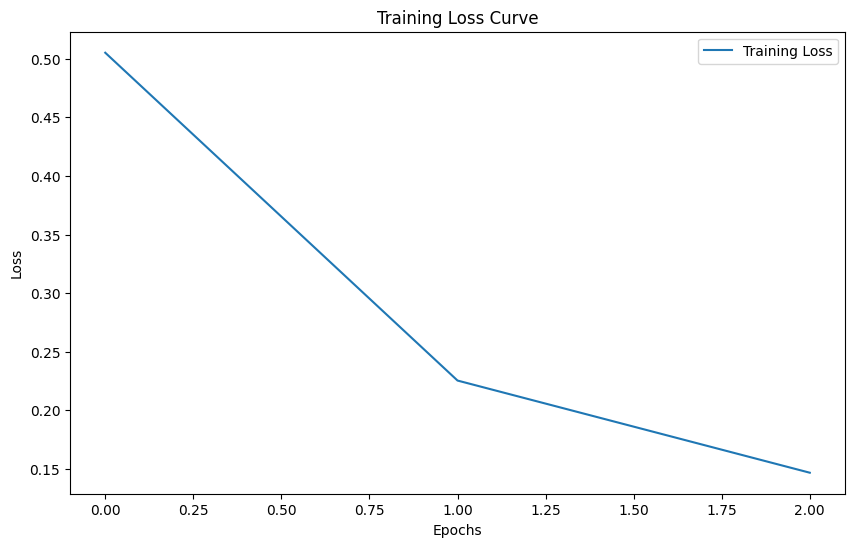

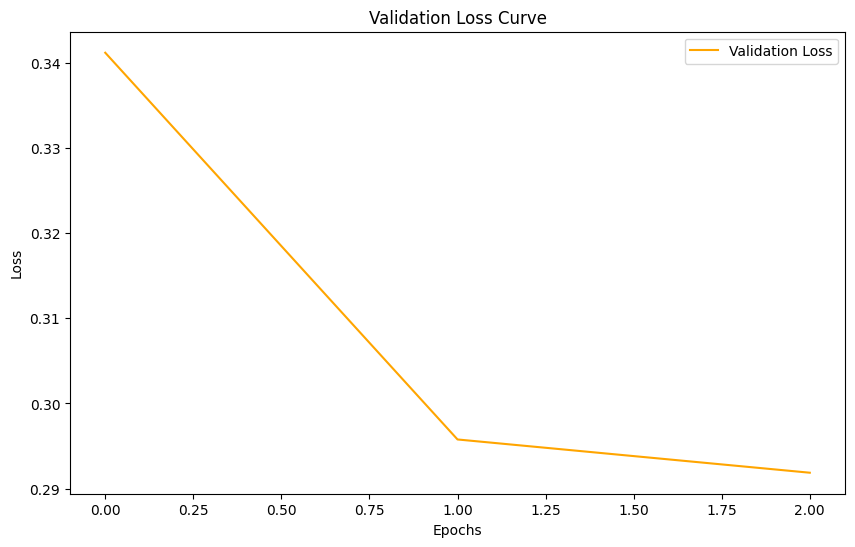

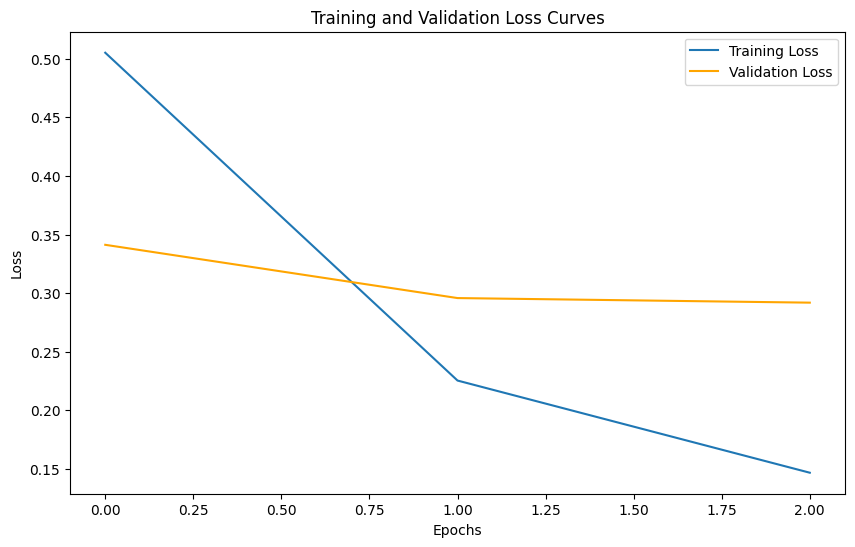

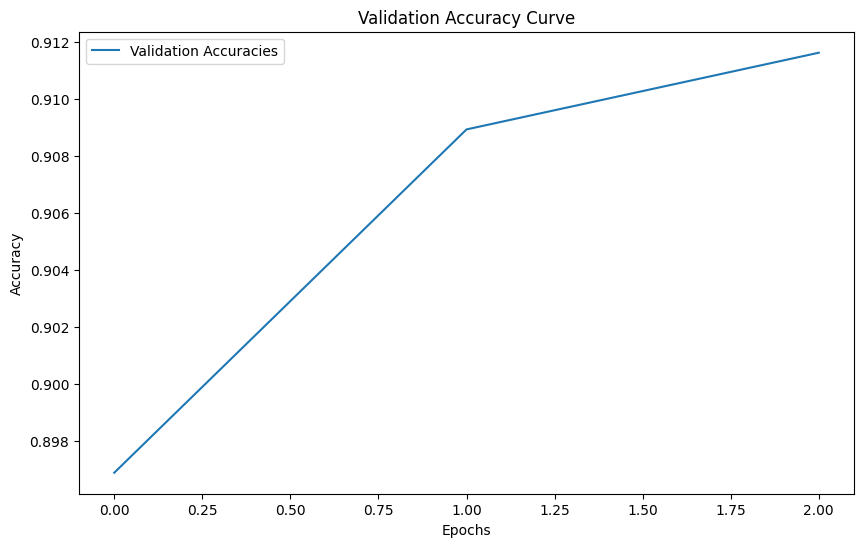

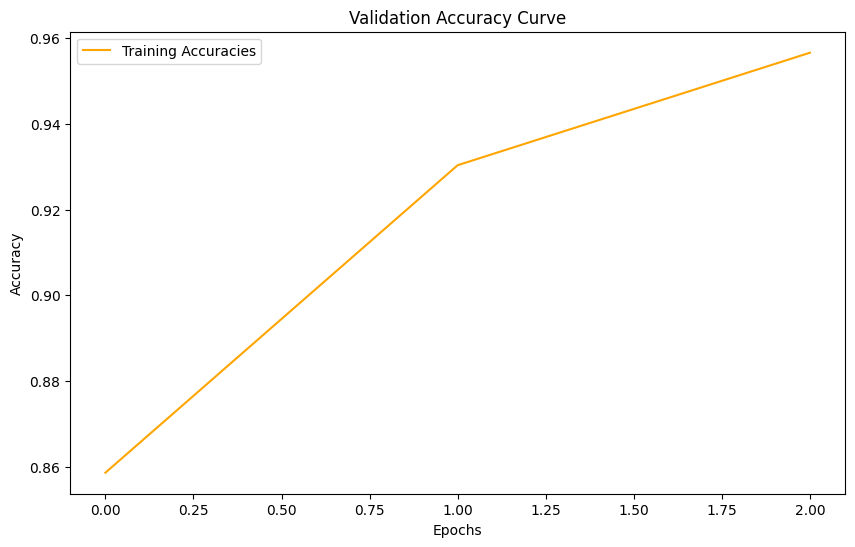

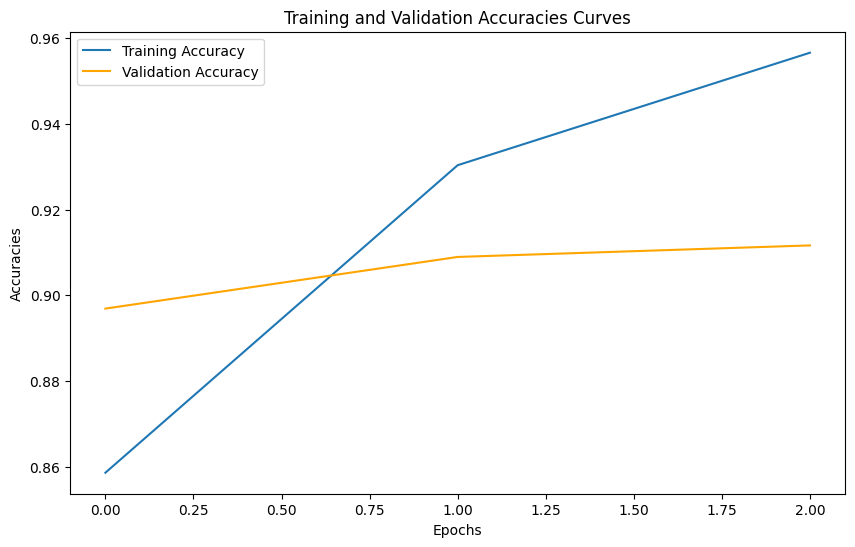

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import evaluate


train_losses = []
train_accuracies = []
val_losses = []
val_accuracies=[]
epochs = []
epoch_counter = 0

progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        logits = outputs.logits


        # Calculate accuracy
        _, predicted = torch.max(logits, 1)
        correct_train_predictions += (predicted == batch["labels"]).sum().item()
        total_train_samples += batch["labels"].size(0)


        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        with torch.no_grad():
            total_train_loss += loss.item()
        progress_bar.update(1)



    # Store the average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train_predictions / total_train_samples
    train_accuracies.append(train_accuracy)
    train_losses.append(avg_train_loss)
    epochs.append(epoch_counter)
    epoch_counter += 1
    val_acc, val_loss = eval_loss(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print losses for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs} - Training Loss: {avg_train_loss:.6f}, Validation Loss: {val_loss:.6f}, Training Acc: {train_accuracy}, Validation Acc: {val_acc}, lr: {optimizer.param_groups[0]['lr']}")
    # lr_scheduler.step()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

# Plot validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_losses, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Curve")
plt.legend()
plt.show()

# Plot both training and validation losses in the same figure
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, val_losses, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_accuracies, label="Validation Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Curve")
plt.legend()
plt.show()

# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label="Training Accuracies", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Curve")
plt.legend()
plt.show()



# Plot both training and validation accuracies in the same figure
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label="Training Accuracy")
plt.plot(epochs, val_accuracies, label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Training and Validation Accuracies Curves")
plt.legend()
plt.show()



In [ ]:
import datetime
import pytz

def get_cur_time():
    np_tz=pytz.timezone('Asia/Kathmandu')
    # np_tz.tzname()
    utc_time=datetime.datetime.now()
    return utc_time.astimezone(np_tz).isoformat().split('.')[0]
# print("Local time {}".format(utc_time.astimezone().isoformat()))


In [ ]:
cur_time = get_cur_time()
model_name.replace('/','_') + 'finetuned_koshish_final'+'_' + cur_time

'Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:41:57'

In [ ]:


# Save the model
# Assuming 'model' is your fine-tuned BERT model
cur_time = get_cur_time()
model_dir = model_name.replace('/','_') +'finetuned_koshish_final'+ '_' + cur_time
# model.save_pretrained("/content/drive/MyDrive/fine_tuned_13cat_patrakar_model")
model.save_pretrained(f"/content/drive/MyDrive/sagar_classifier/models/{model_dir}")


# Assuming 'tokenizer' is your BERT tokenizer
# tokenizer.save_pretrained("/content/drive/MyDrive/fine_tuned_13cat_patrakar_model")
tokenizer.save_pretrained(f"/content/drive/MyDrive/sagar_classifier/models/{model_dir}")



('/content/drive/MyDrive/sagar_classifier/models/Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:45:45/tokenizer_config.json',
 '/content/drive/MyDrive/sagar_classifier/models/Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:45:45/special_tokens_map.json',
 '/content/drive/MyDrive/sagar_classifier/models/Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:45:45/vocab.txt',
 '/content/drive/MyDrive/sagar_classifier/models/Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:45:45/added_tokens.json',
 '/content/drive/MyDrive/sagar_classifier/models/Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:45:45/tokenizer.json')

In [ ]:
X_test.shape

In [ ]:
X_test.head()

In [ ]:
Y_test.head()

In [ ]:
sum(Y_test == 14)

In [ ]:
from os import path


In [ ]:
trained_model_dir = '/content/drive/MyDrive/sagar_classifier/models/Shushant_nepaliBERTfinetuned_koshish_final_2024-02-12T08:45:45'

In [ ]:
test_model = AutoModelForSequenceClassification.from_pretrained(trained_model_dir)

In [ ]:
test_tokenizer = AutoTokenizer.from_pretrained(trained_model_dir)

In [ ]:
!pip install evaluate

In [ ]:

import evaluate
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
test_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
category[category.target==0].label.iloc[0]

'Education'

In [ ]:
df[["preprocessed_text","category"]].groupby("category").count()

,preprocessed_text
category,
Automobile,2999
Business,3000
Crime,2999
Education,3000
Entertainment,3000
Health,3000
Literature,3000
Market,3000
Politics,3000


In [ ]:
Y_test.unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
accuracy=eval_loss(test_model,val_loader)
print("Accuracy is :" , accuracy[0] * 100)

Accuracy is : 91.16213442791175


In [ ]:
print('***Checking the accuracy of each category ***')
for cat in category.target:
    Y_cat_ids = (Y_test == cat)
    Y_test_cat = Y_test[Y_cat_ids]
    X_test_cat = X_test[Y_cat_ids]
    val_dataset = NewsDataset(X_test_cat.to_list(), Y_test_cat.to_list(), test_tokenizer)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    acc, _ = eval_loss(test_model, val_loader)
    print(f'Category: {category[category.target==cat].label.iloc[0]} has accuracy: {acc * 100} ')
    # break



***Checking the accuracy of each category ***
Category: Education has accuracy: 95.84717607973423 
Category: World has accuracy: 92.78688524590164 
Category: Sports has accuracy: 98.56459330143541 
Category: Technology has accuracy: 85.90831918505943 
Category: Crime has accuracy: 96.37561779242174 
Category: Health has accuracy: 92.93103448275862 
Category: Market has accuracy: 90.67796610169492 
Category: Politics has accuracy: 93.01948051948052 
Category: Automobile has accuracy: 92.72097053726169 
Category: Tourism has accuracy: 92.99145299145299 
Category: Literature has accuracy: 82.78260869565217 
Category: Entertainment has accuracy: 88.24476650563608 
Category: Business has accuracy: 81.84764991896273 


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
print("Accuracy:", accuracy * 100)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 91.16213442791175
Precision: 0.9118171493926563
Recall: 0.9116213442791175
F1 Score: 0.9113949489751988


In [ ]:
import torch
import numpy as np

# Assuming you have already imported the evaluate module correctly
metric = evaluate.load("accuracy")
# Assuming test_model is your fine-tuned BERT model
x=test_model.eval()


y_true = []
y_pred = []

# Assuming val_loader is your DataLoader for the validation data
num_val_batches = len(val_loader)

# Iterate over the validation data
for batch in val_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = test_model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # Assuming your evaluate module handles adding batches and references
    metric.add_batch(predictions=predictions, references=batch["labels"])

    true_labels = batch["labels"].cpu().numpy()
    y_true.extend(true_labels)
    y_pred.extend(predictions.cpu().numpy())

# Assuming metric is an instance of the loaded evaluation metric
# Assuming compute() method calculates the final metric value
final_metric = metric.compute()
print(final_metric)

# Convert y_true and y_pred to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Now you can further analyze y_true and y_pred, or use them for other purposes


{'accuracy': 0.9116213442791175}


In [ ]:
print(len(predictions))

In [ ]:
print(train_losses)

In [ ]:
# Generate training steps for plotting
training_steps = list(range(1, len(train_losses) + 1))
# Plotting the training vs validation loss curve
plt.plot(training_steps, train_losses, 'b-', label='Training Loss')
plt.plot(training_steps[:len(val_losses)], val_losses, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Training Steps')

plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
print("Accuracy:", accuracy * 100)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

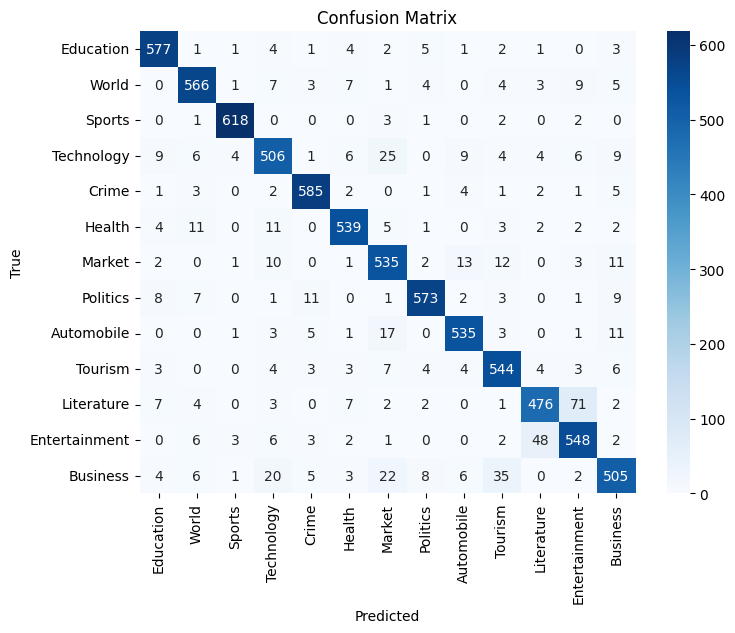

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()